In [104]:
import pandas as pd

YEARS = [2019]

data = pd.DataFrame()

#ingest
for year in YEARS:
    data = data.append(pd.read_csv(f"data/play_by_play_cleaned_{year}.csv.gz", compression='gzip', low_memory=False).reset_index(drop=True), sort=True)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)
data.reset_index(drop=True, inplace=True)

In [113]:
data['epa_success'] = data['epa'].map(lambda x: 1 if x>0 else 0)
data[list(filter(lambda x: 'epa' in x, data.columns))]

,air_epa,comp_air_epa,comp_yac_epa,epa,qb_epa,total_away_comp_air_epa,total_away_comp_yac_epa,total_away_epa,total_away_pass_epa,total_away_raw_air_epa,total_away_raw_yac_epa,total_away_rush_epa,total_home_comp_air_epa,total_home_comp_yac_epa,total_home_epa,total_home_pass_epa,total_home_raw_air_epa,total_home_raw_yac_epa,total_home_rush_epa,xyac_epa,yac_epa,epa_success
0,NaN,0.000000,0.000000,-1.658762,-1.658762,0.000000,0.000000,-1.658762,-1.658762,0.000000,0.000000,0.000000,0.000000,0.000000,1.658762,1.658762,0.000000,0.000000,0.000000,NaN,NaN,0
1,NaN,0.000000,0.000000,-0.538917,-0.538917,0.000000,0.000000,-2.197679,-1.658762,0.000000,0.000000,-0.538917,0.000000,0.000000,2.197679,1.658762,0.000000,0.000000,0.538917,NaN,NaN,0
2,NaN,0.000000,0.000000,0.142135,0.142135,0.000000,0.000000,-2.055544,-1.658762,0.000000,0.000000,-0.396782,0.000000,0.000000,2.055544,1.658762,0.000000,0.000000,0.396782,NaN,NaN,1
3,NaN,0.000000,0.000000,-1.125094,-1.125094,0.000000,0.000000,-4.964747,-1.658762,0.000000,0.000000,-0.396782,0.000000,0.000000,4.964747,1.658762,0.000000,0.000000,0.396782,NaN,NaN,0
4,-0.553484,-0.553484,0.811614,0.258130,0.258130,0.553484,-0.811614,-5.222877,-1.916892,0.553484,-0.811614,-0.396782,-0.553484,0.811614,5.222877,1.916892,-0.553484,0.811614,0.396782,0.747668,0.811614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38036,1.968242,0.000000,0.000000,-0.493792,-0.493792,-6.130702,-1.740457,-9.884178,0.470239,-2.494805,0.426905,-7.506256,6.130702,1.740457,9.884178,-0.470239,2.494805,-0.426905,7.506256,1.888805,-2.462034,0
38037,NaN,0.000000,0.000000,0.000000,0.000000,-6.130702,-1.740457,-9.884178,0.470239,-2.494805,0.426905,-7.506256,6.130702,1.740457,9.884178,-0.470239,2.494805,-0.426905,7.506256,NaN,NaN,0
38038,NaN,0.000000,0.000000,0.000000,0.000000,-6.130702,-1.740457,-9.884178,0.470239,-2.494805,0.426905,-7.506256,6.130702,1.740457,9.884178,-0.470239,2.494805,-0.426905,7.506256,NaN,NaN,0
38039,NaN,0.000000,0.000000,0.000000,0.000000,-6.130702,-1.740457,-9.773555,0.470239,-2.494805,0.426905,-7.506256,6.130702,1.740457,9.773555,-0.470239,2.494805,-0.426905,7.506256,NaN,NaN,0


In [114]:
play_count_limit = 15
def getDF(team):
    global data
    team_df = data.loc[(data.play_type!="no_play") & (data.posteam == team) & ~((data.receiver.isna()) & (data.play_type=='pass') & (data.qb_scramble==0))].reset_index(drop=True)
    team_df['skillPlayer'] = team_df['rusher']
    team_df['skillPlayer'].loc[team_df.play_type=='run'] = team_df['rusher'].astype(str) + ' carry'
    team_df['skillPlayer'].loc[(team_df.play_type=='pass')] = team_df['receiver'].astype(str) + ' target'
    team_df['skillPlayer'].loc[team_df.qb_scramble==1] = team_df['passer'].astype(str) + ' scramble'
    df = team_df.groupby('skillPlayer', as_index=False).agg(epa_per_play = ('epa', 'mean'), series_success_rate = ('series_success', 'mean'), epa_success_rate=('epa_success', 'mean'), play_count=('play_id', 'count')).sort_values(by='series_success_rate', ascending=False).round(2)
    return df.loc[df.play_count>=play_count_limit].reset_index(drop=True)

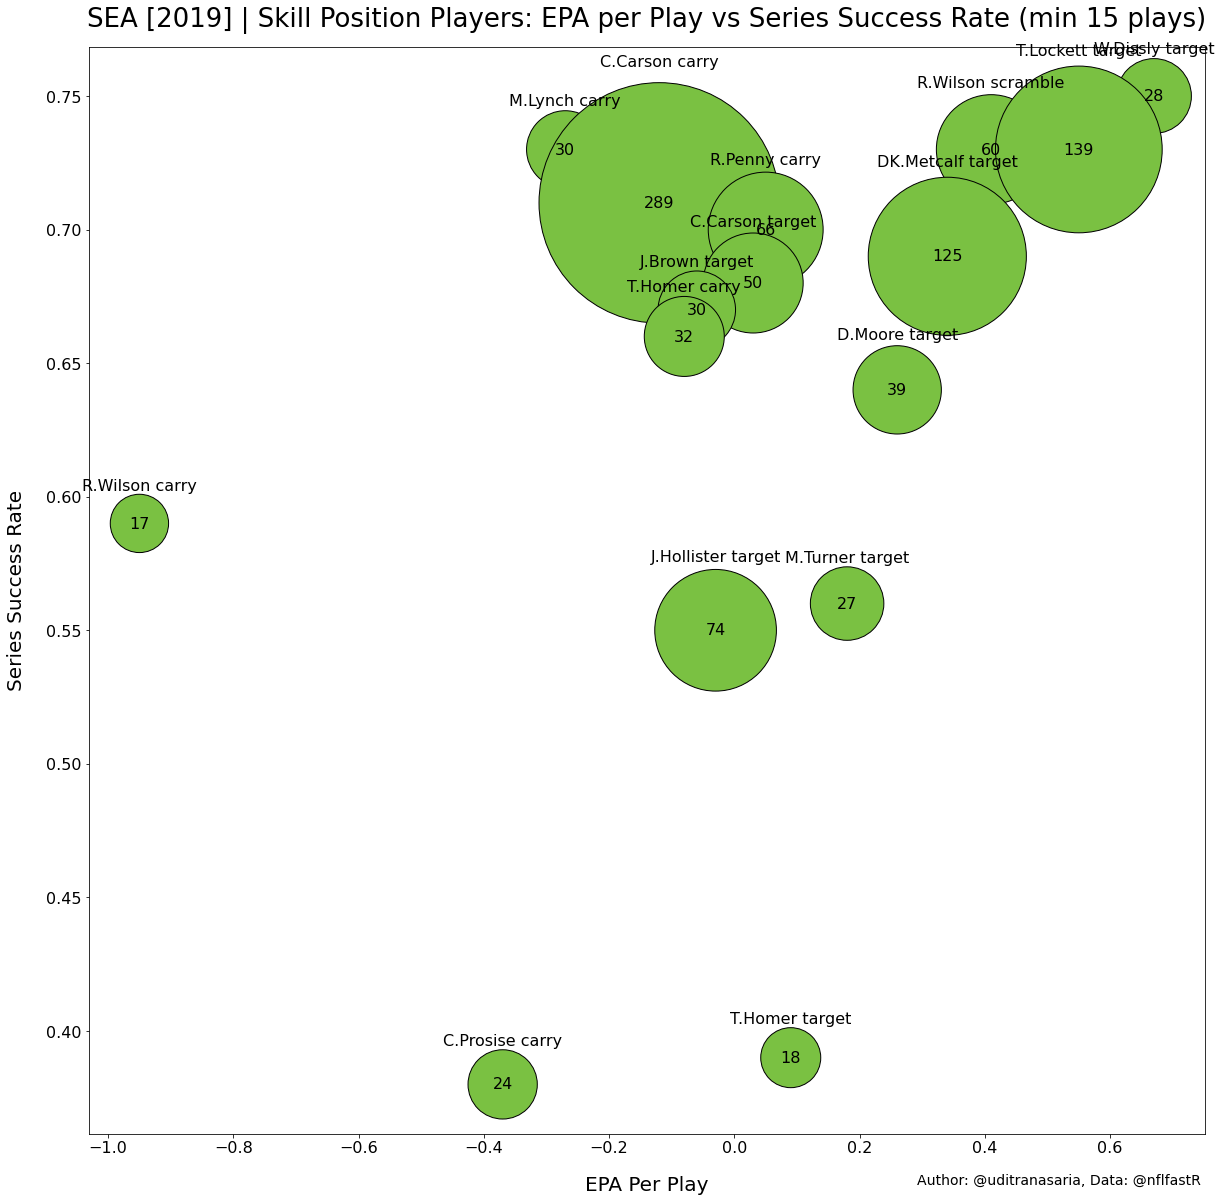

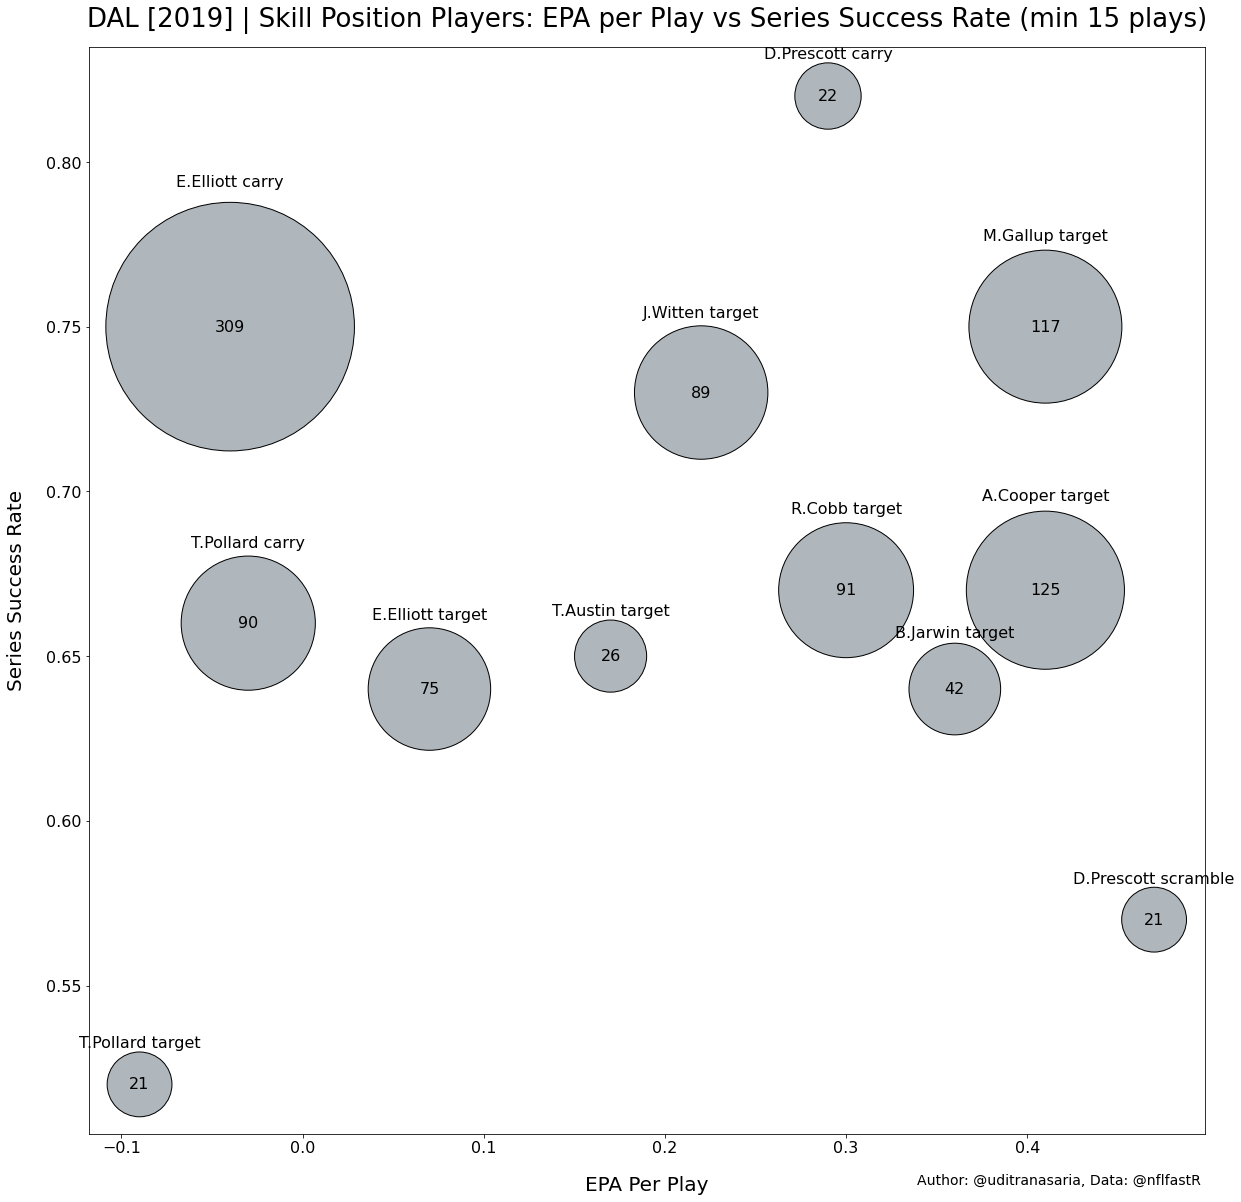

In [109]:
import matplotlib.pyplot as plt
import math
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

# for team in list(COLORS.keys()):
for team in ['SEA', "DAL"]:
    df = getDF(team)
    fig2, ax = plt.subplots(figsize=(20,20))
    xs = df['epa_per_play']
    ys = df['series_success_rate']
    labels = df['skillPlayer']
    szs = df['play_count']

    ax.scatter(xs, ys, s=szs*200, c=COLORS[team], edgecolors='black')

    for x,y,l,s in zip(xs,ys,labels,szs):
        # this method is called for each point
        plt.annotate(l, # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0, math.sqrt(s)*8), # distance from text to points (x,y)
                    ha='center',
                    fontsize=16) # horizontal alignment can be left, right or center

        plt.annotate(str(s), # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0, 0), # distance from text to points (x,y)
                    ha='center',
                    va='center',
                    fontsize=16) # horizontal alignment can be left, right or center


    ax.set_xlabel('EPA Per Play', fontsize=20, labelpad=20)
    plt.rc('xtick', labelsize=16)

    # ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
    ax.set_ylabel('Series Success Rate',fontsize=20,labelpad=20)
    plt.rc('ytick', labelsize=16)

    title = f'{team} {YEARS} | Skill Position Players: EPA per Play vs Series Success Rate (min {play_count_limit} plays)'
    ax.set_title(title, fontsize=26,pad=20)
    plt.figtext(.7,.09,'Author: @uditranasaria, Data: @nflfastR',fontsize=14)

    # plt.savefig(f'./saved/SkillPositionSeriesSuccess/{title}.png', dpi=200)
    plt.show()

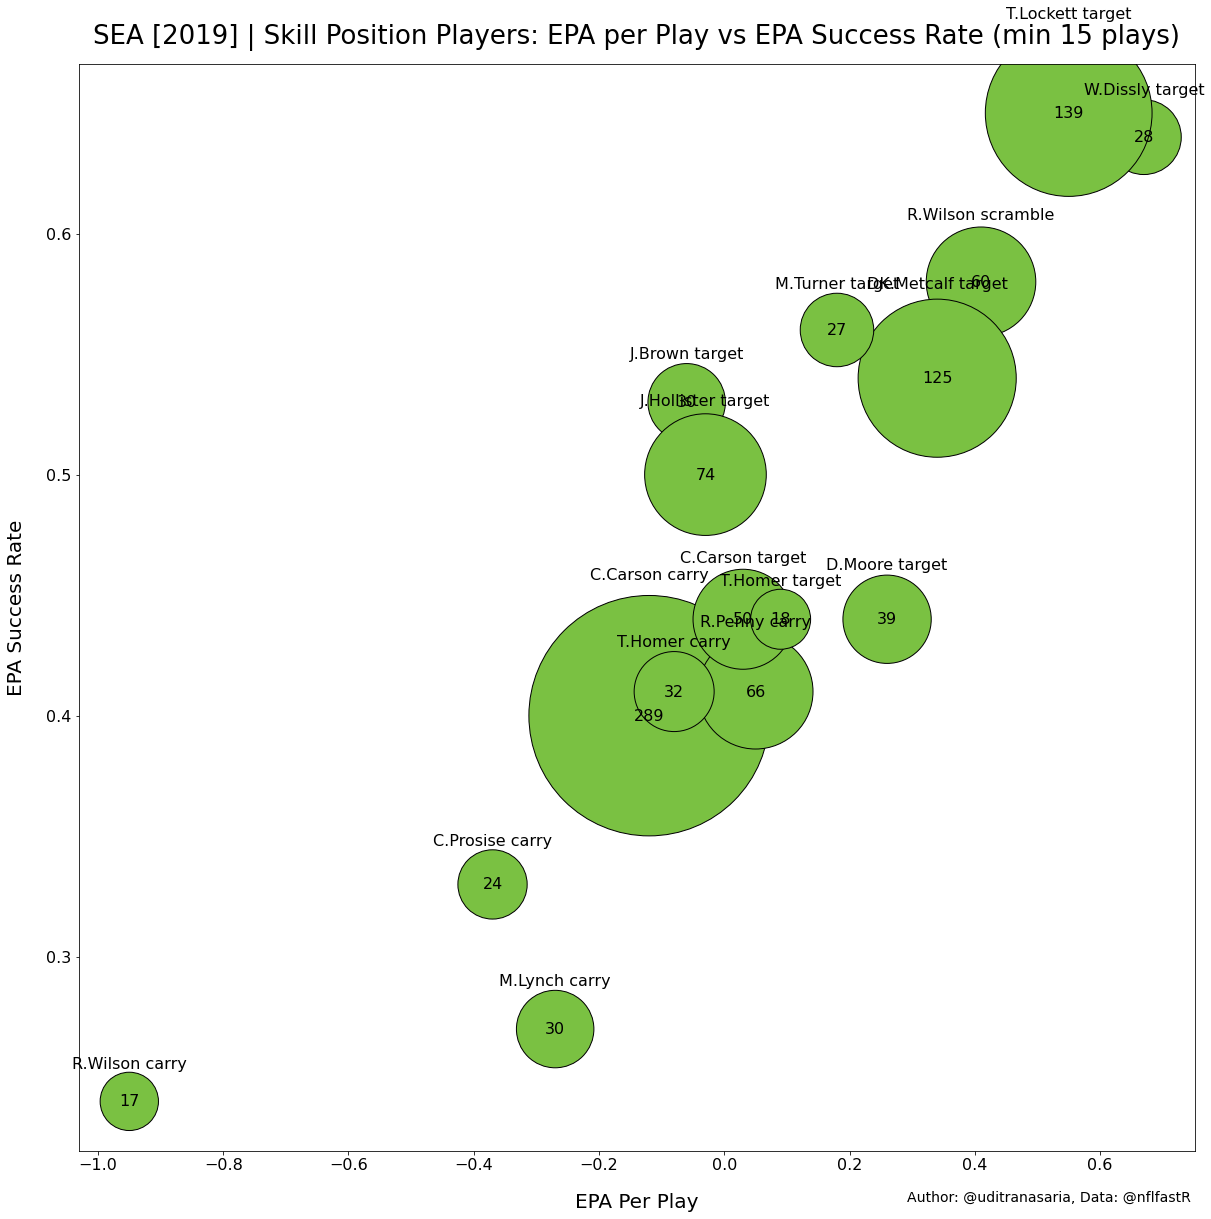

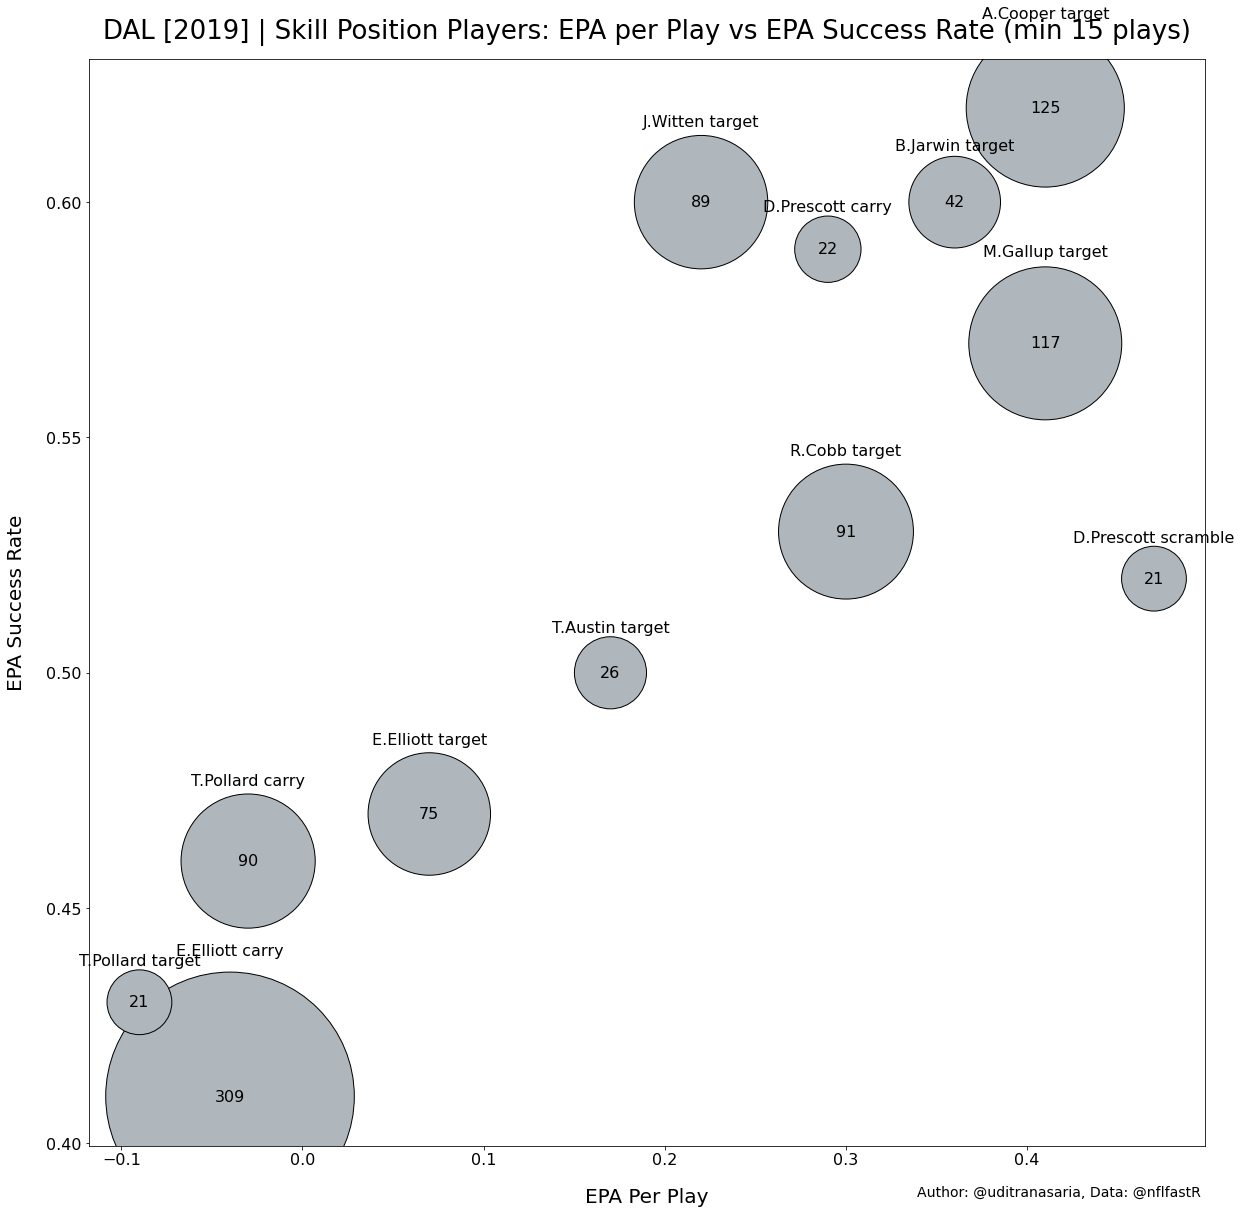

In [115]:
for team in ['SEA', "DAL"]:
    df = getDF(team)
    fig2, ax = plt.subplots(figsize=(20,20))
    xs = df['epa_per_play']
    ys = df['epa_success_rate']
    labels = df['skillPlayer']
    szs = df['play_count']

    ax.scatter(xs, ys, s=szs*200, c=COLORS[team], edgecolors='black')

    for x,y,l,s in zip(xs,ys,labels,szs):
        # this method is called for each point
        plt.annotate(l, # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0, math.sqrt(s)*8), # distance from text to points (x,y)
                    ha='center',
                    fontsize=16) # horizontal alignment can be left, right or center

        plt.annotate(str(s), # this is the text
                    (x,y), # this is the point to label
                    textcoords="offset points", # how to position the text
                    xytext=(0, 0), # distance from text to points (x,y)
                    ha='center',
                    va='center',
                    fontsize=16) # horizontal alignment can be left, right or center


    ax.set_xlabel('EPA Per Play', fontsize=20, labelpad=20)
    plt.rc('xtick', labelsize=16)

    # ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=16)
    ax.set_ylabel('EPA Success Rate',fontsize=20,labelpad=20)
    plt.rc('ytick', labelsize=16)

    title = f'{team} {YEARS} | Skill Position Players: EPA per Play vs EPA Success Rate (min {play_count_limit} plays)'
    ax.set_title(title, fontsize=26,pad=20)
    plt.figtext(.7,.09,'Author: @uditranasaria, Data: @nflfastR',fontsize=14)

    # plt.savefig(f'./saved/SkillPositionSeriesSuccess/{title}.png', dpi=200)
    plt.show()